In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

from interpreter.gate import GateBasedInterpreter
from interpreter.adiabatic import AdiabaticInterpreter
from interpreter.planar import PlanarClockInterpreter
from frontend.compress import Compress

/var/folders/bn/crs9z9xj4rj970hs60kl_6pw0000gn/T/ipykernel_67487/46661495.py:1: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate
/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])



*** INFO ***

locality mode = 5
compress mode = no
qubit map = None
# of gates = 5
# of computation qubits (n) = 2
# of clock qubits (L) = 5
# of ending identities = 0

*** END OF INFO ***



  0%|          | 0/7 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:602: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
/opt/homebrew/Caskroom/miniconda/base/envs/ac/lib/python3.10/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 7/7 [00:00<00:00, 27.64it/s]


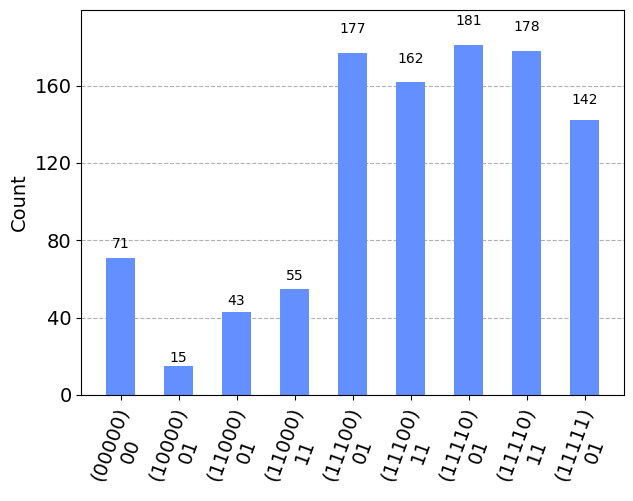

In [2]:
from qiskit.extensions import UnitaryGate
from qiskit.circuit.library import GroverOperator, QFT

# NOTE: the resource-expensive task happens in "spsolve()" in matrix exponential
# So I modify the code by adding a progress bar on the for loop in "spsolve()"
# it is around line 296 in linsolve.py, do it if you want to see the progress

n = 2
exp2_n = 2**n

# # 1. Grover
# qc = QuantumCircuit(n)
# arr = [1] * exp2_n
# arr[1] = -1
# grover = QuantumCircuit(n)
# grover.append(UnitaryGate(np.diag(arr)), range(n))
# grover = GroverOperator(grover).decompose()
# qc = QuantumCircuit(n)
# qc.h(range(n))
# for _ in range(max(1, int((np.pi / (2 * np.arcsin(1 / np.sqrt(exp2_n))) - 1) / 2))):
#     qc.compose(grover, inplace=True)

# 2. QFT
qc = QuantumCircuit(n)
qc.x(0)
qc.compose(QFT(n).decompose(), inplace=True)
qc.compose(QFT(n, inverse=True).decompose(), inplace=True)

# # 2. Result of gate-based approach
# qc = QuantumCircuit(1)
# qc.h(0)
# qc.i(0)

gb_sol = GateBasedInterpreter()
adiab_sol = AdiabaticInterpreter(compress=Compress.no, transpile_to_two=True)
plot_histogram([adiab_sol.run(qc, all_histories=True)])

In [3]:
# PlanarClockInterpreter().run()